# Bio Signal Analysis for Smoking

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smoking.csv')
df = df.drop(columns=['ID','oral'])
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,N,0


Exploratory Data Analysis (EDA)

In [3]:
df.shape

(55692, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [5]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [7]:
df.apply(lambda x: x.unique())

gender                                                            [F, M]
age                    [40, 55, 30, 45, 50, 35, 60, 25, 65, 20, 80, 7...
height(cm)             [155, 160, 170, 165, 180, 150, 175, 140, 185, ...
weight(kg)             [60, 70, 75, 90, 65, 45, 55, 50, 85, 80, 100, ...
waist(cm)              [81.3, 81.0, 80.0, 88.0, 86.0, 85.0, 85.5, 96....
eyesight(left)         [1.2, 0.8, 1.5, 1.0, 0.7, 0.9, 0.3, 0.2, 0.1, ...
eyesight(right)        [1.0, 0.6, 0.8, 1.5, 1.2, 0.7, 0.4, 0.9, 0.3, ...
hearing(left)                                                 [1.0, 2.0]
hearing(right)                                                [1.0, 2.0]
systolic               [114.0, 119.0, 138.0, 100.0, 120.0, 128.0, 116...
relaxation             [73.0, 70.0, 86.0, 60.0, 74.0, 76.0, 82.0, 96....
fasting blood sugar    [94.0, 130.0, 89.0, 96.0, 80.0, 95.0, 158.0, 8...
Cholesterol            [215.0, 192.0, 242.0, 322.0, 184.0, 217.0, 226...
triglyceride           [82.0, 115.0, 182.0, 254.0, 

DATA VISUALIZATION

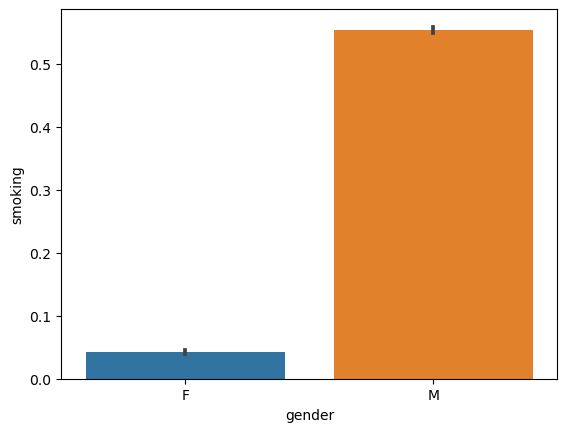

In [8]:
sns.barplot(x=df['gender'],y=df['smoking'])
plt.show()

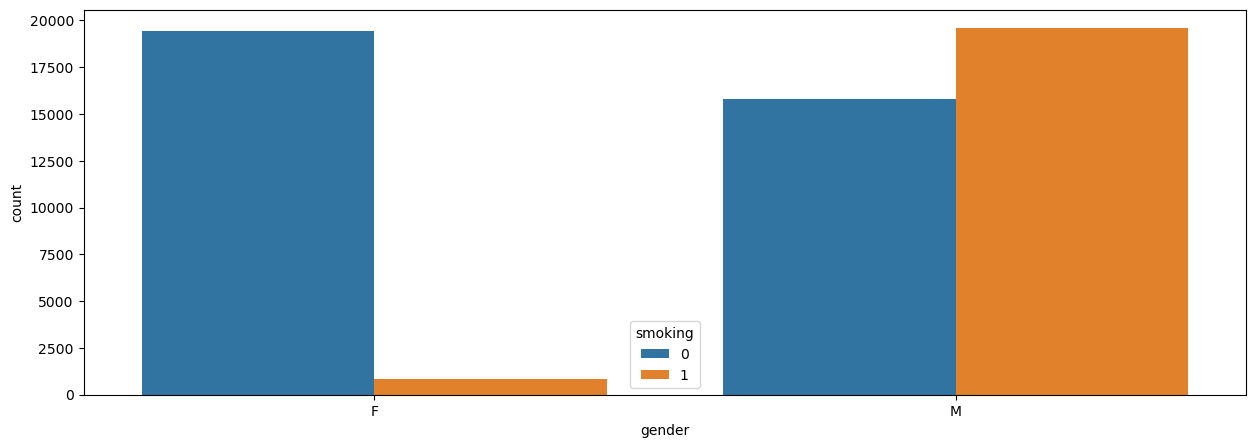

In [9]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df['gender'], hue=df['smoking'])
plt.show()

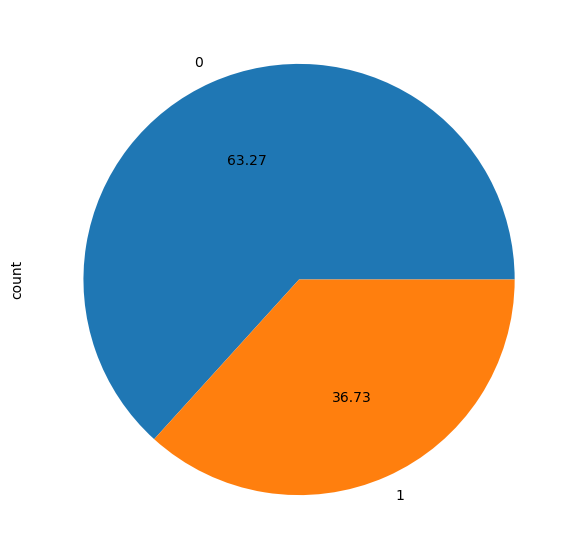

In [10]:
plt.figure(figsize=(10,7))
df['smoking'].value_counts().plot.pie(autopct='%0.2f')
plt.show()

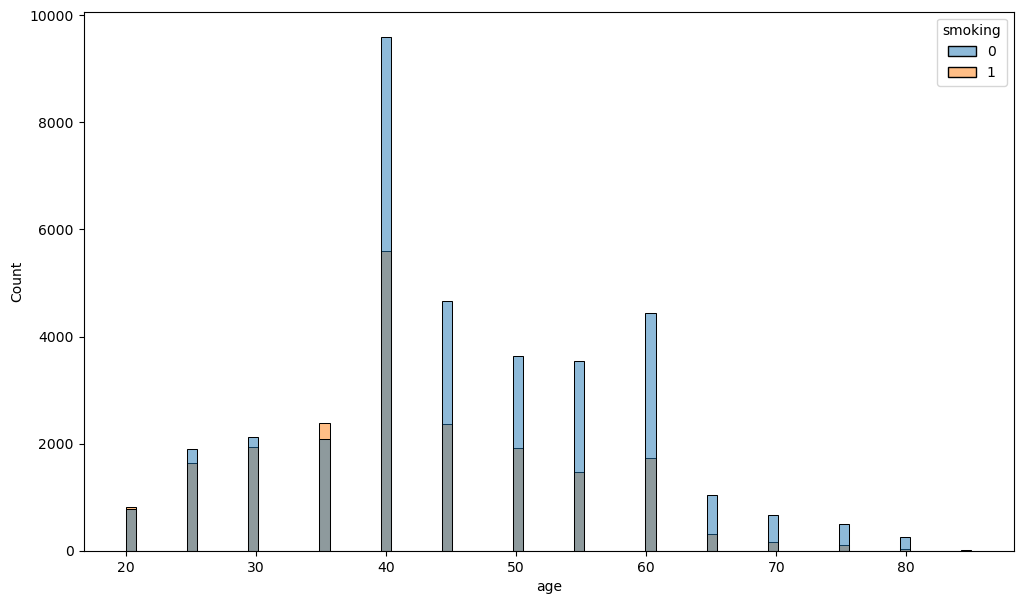

In [11]:
# Suppress FutureWarning related to use_inf_as_na
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12,7))
sns.histplot(x=df['age'],hue=df['smoking'])
plt.show()

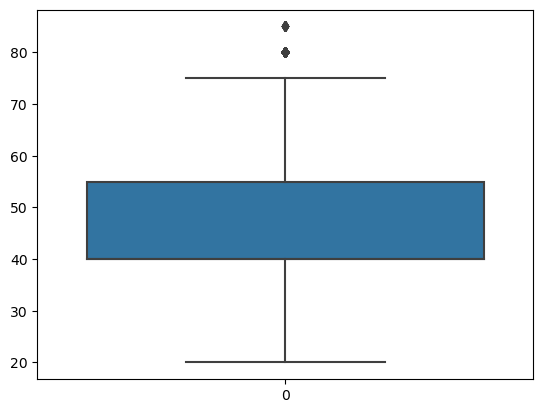

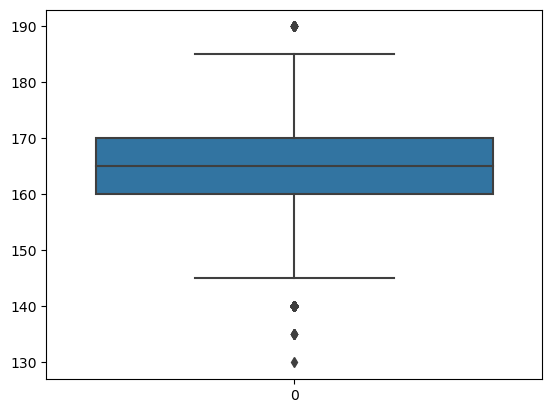

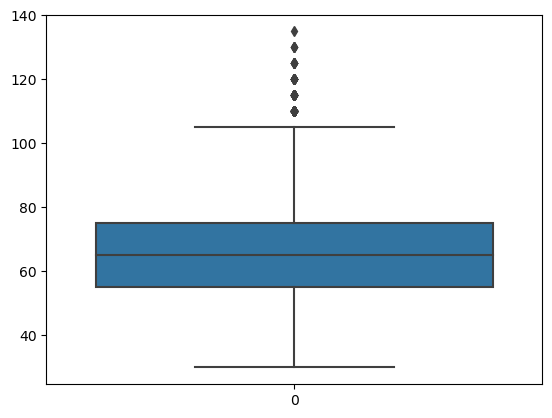

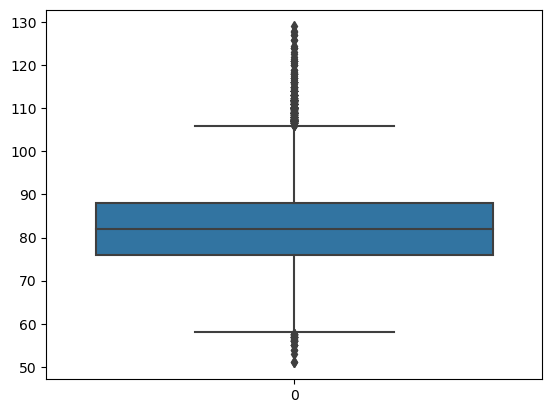

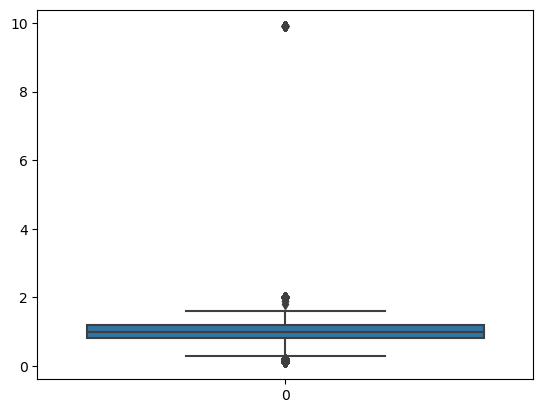

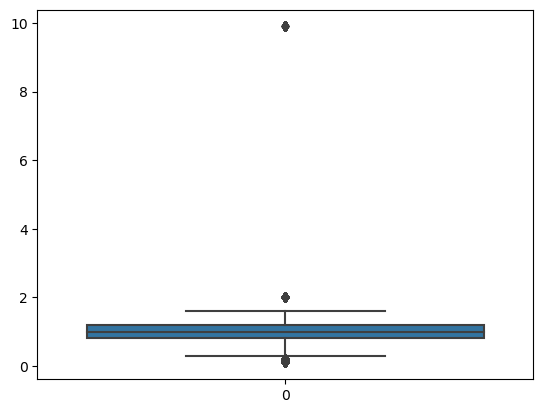

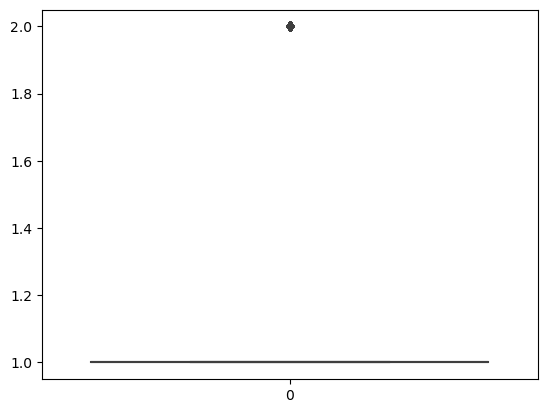

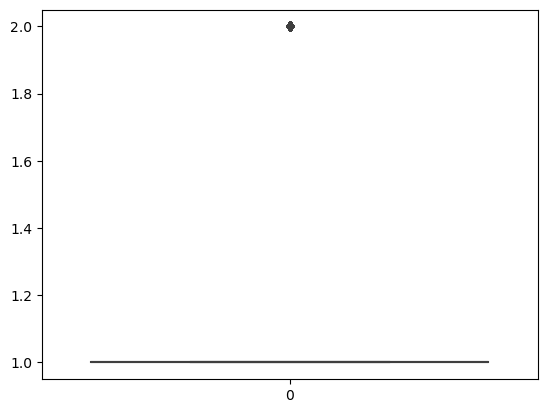

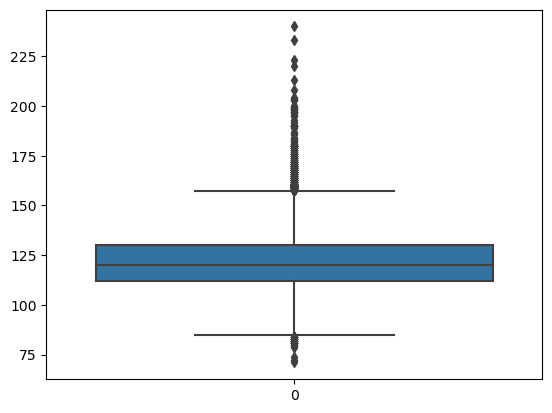

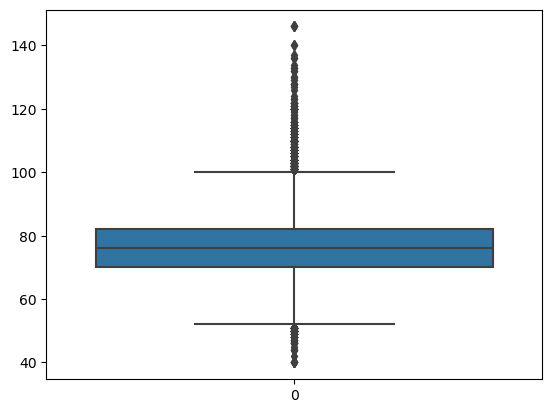

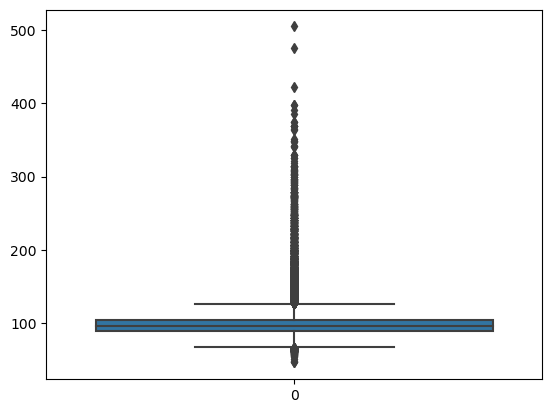

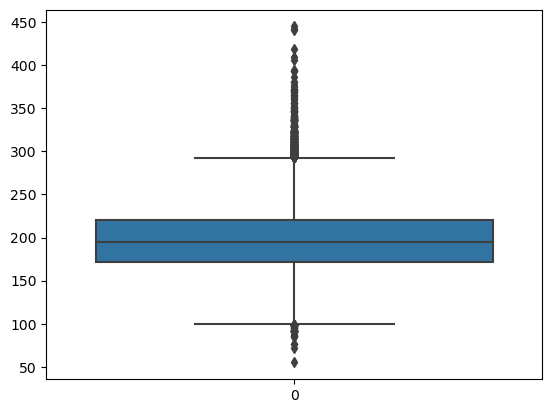

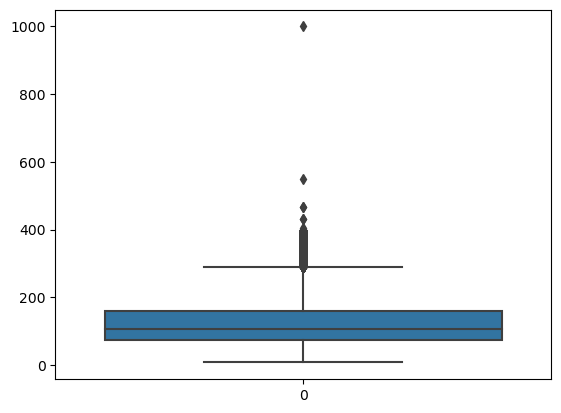

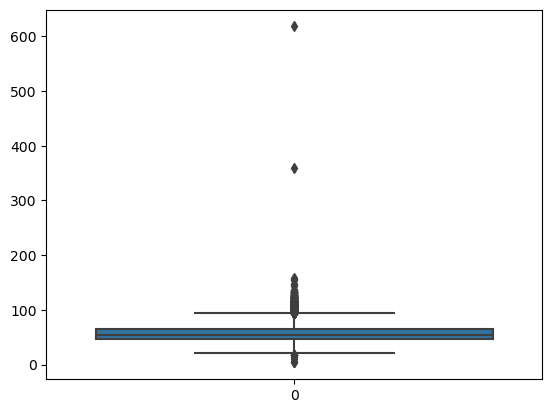

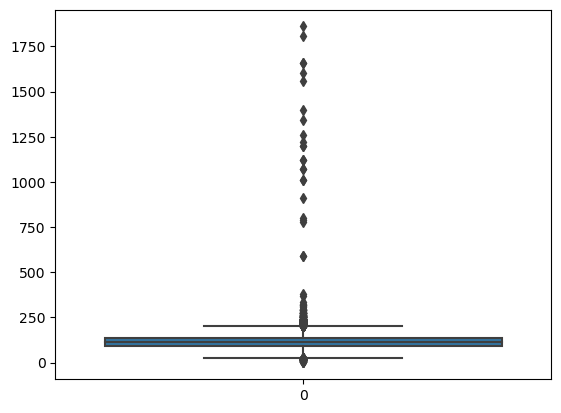

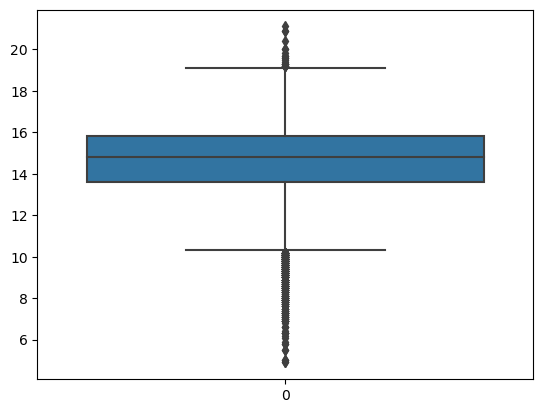

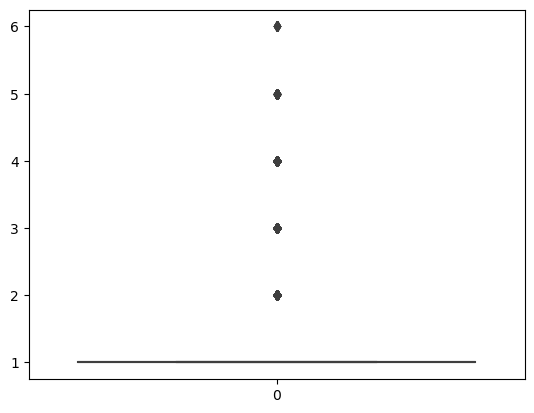

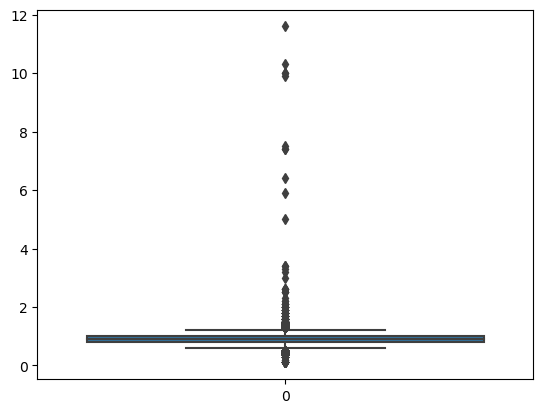

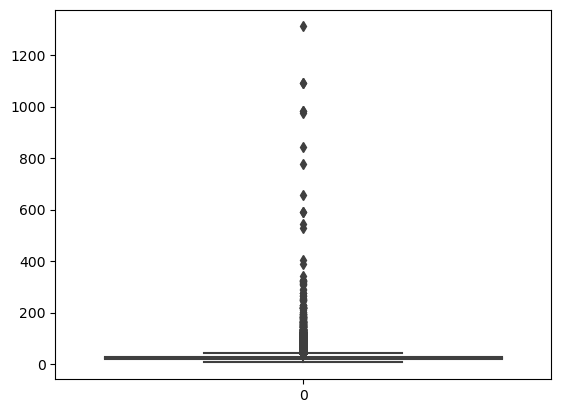

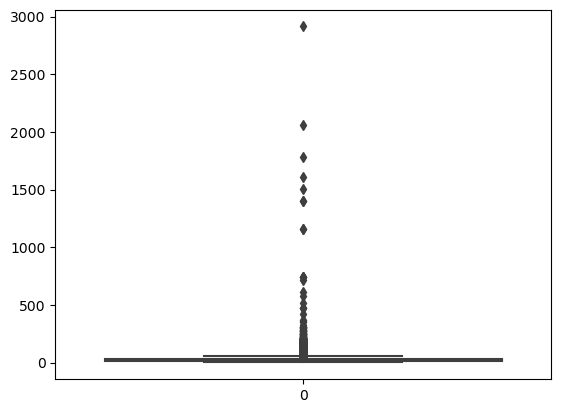

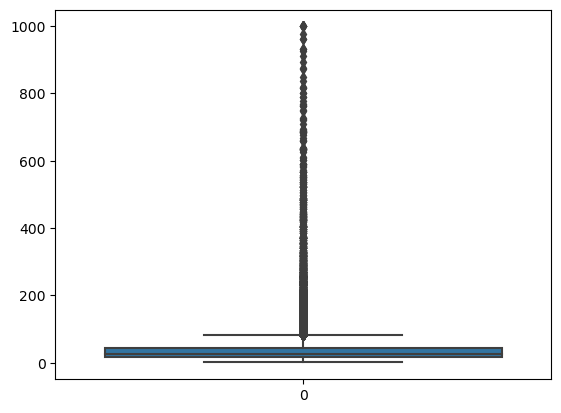

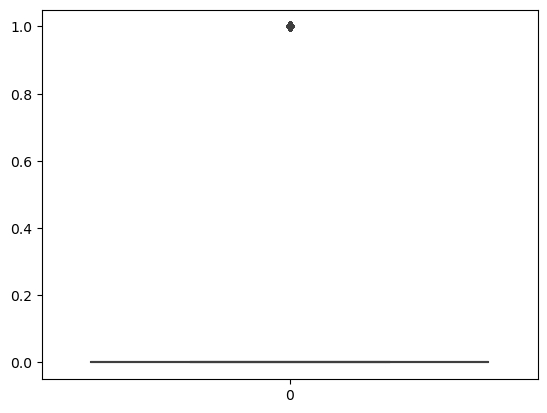

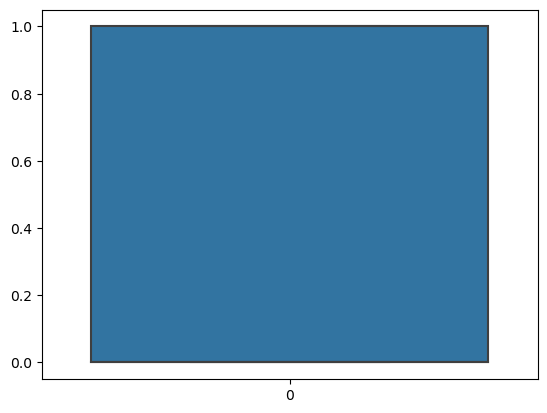

In [12]:
for i in df.columns:
    if(df[i].dtypes=='int64' or df[i].dtypes=='float64'):
        sns.boxplot(df[i])
        plt.show()

DATA PREPROCESSING

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column and convert to int64
c_cols = ['gender' , 'tartar', 'dental caries' ]
df[c_cols] = df[c_cols].apply(lambda col: le.fit_transform(col).astype('int64'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

# FEATURE SELECTION USING FEATURE IMPORTANCE

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

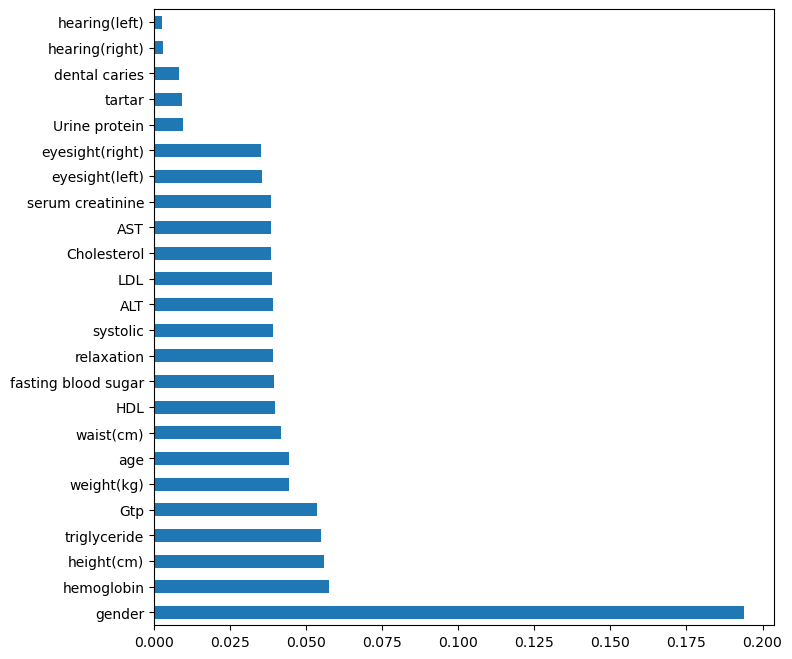

In [16]:
df1= pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(8,8))
df1.nlargest(24).plot(kind='barh')
plt.show()

In [17]:
X = df[['gender','triglyceride','height(cm)','hemoglobin','Gtp','weight(kg)',
        'waist(cm)','age','HDL','fasting blood sugar','LDL','relaxation','ALT','systolic','Cholesterol']]
y = df.iloc[:, -1]

 Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

pd.DataFrame({"actaul_value":y_test,"predicted_value":y_pred})

,actaul_value,predicted_value
33967,0,0
21956,1,0
15458,0,1
36215,0,1
8886,0,1
...,...,...
17853,0,0
31224,1,0
24589,0,0
43475,0,0


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      7027
           1       0.62      0.69      0.65      4112

    accuracy                           0.73     11139
   macro avg       0.71      0.72      0.72     11139
weighted avg       0.74      0.73      0.73     11139


Confusion Matrix:
[[5321 1706]
 [1295 2817]]


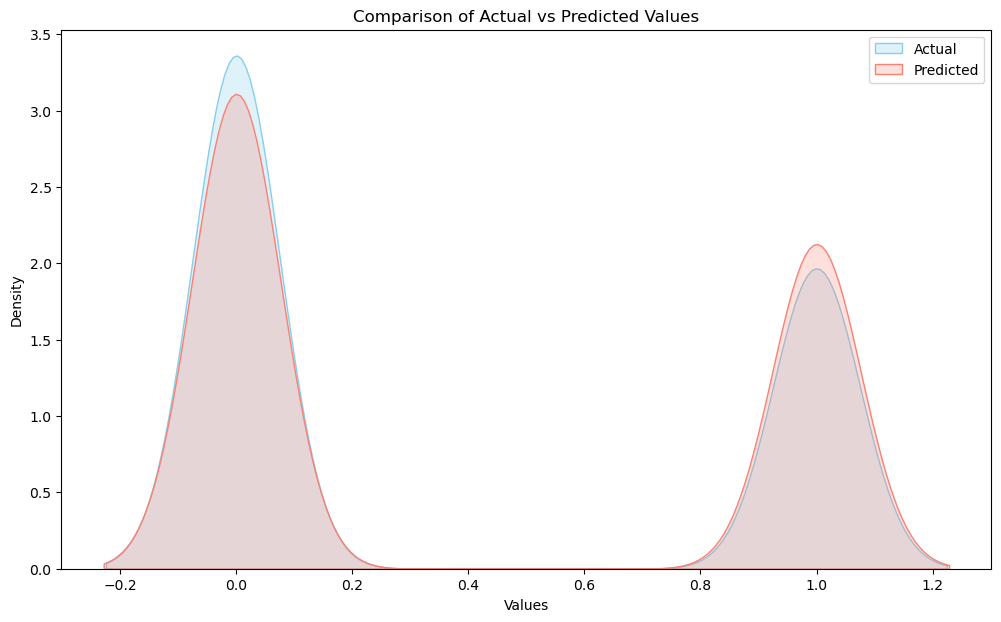

In [20]:
# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the kernel density estimate for actual and predicted values
sns.kdeplot(y_test, label='Actual', fill=True, color='skyblue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='salmon')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7027
           1       0.72      0.71      0.71      4112

    accuracy                           0.79     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.79      0.79      0.79     11139


Confusion Matrix:
[[5865 1162]
 [1178 2934]]


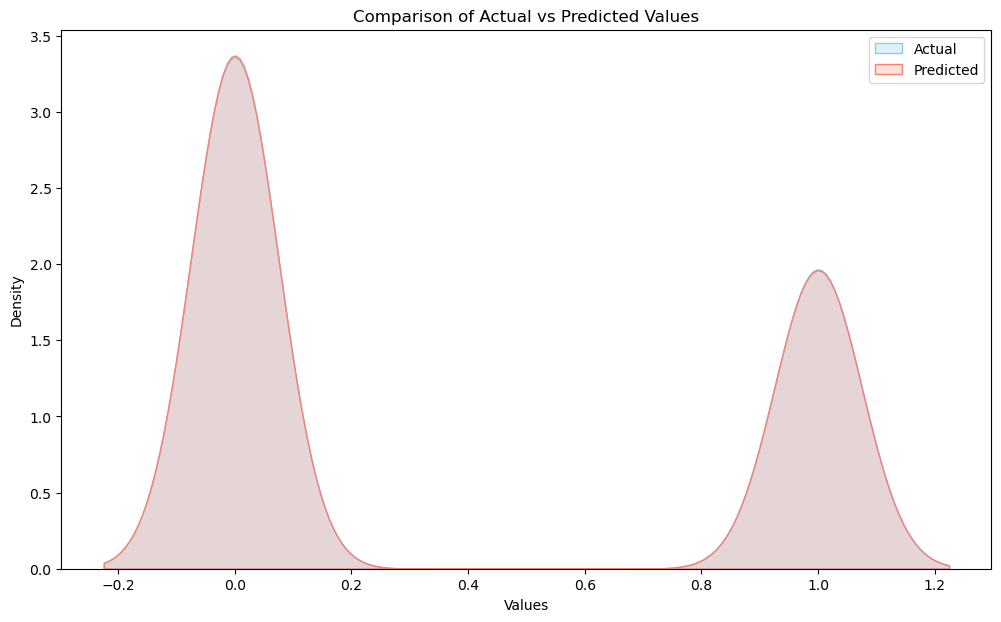

In [23]:
# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the kernel density estimate for actual and predicted values
sns.kdeplot(y_test, label='Actual', fill=True, color='skyblue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='salmon')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


Ensemble Learning with Bagging Classifier

In [24]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators=1000)
bagg.fit(X_train, y_train).score(X_test,y_test)

y_pred = bagg.predict(X_test)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7027
           1       0.75      0.80      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139


Confusion Matrix:
[[5927 1100]
 [ 842 3270]]


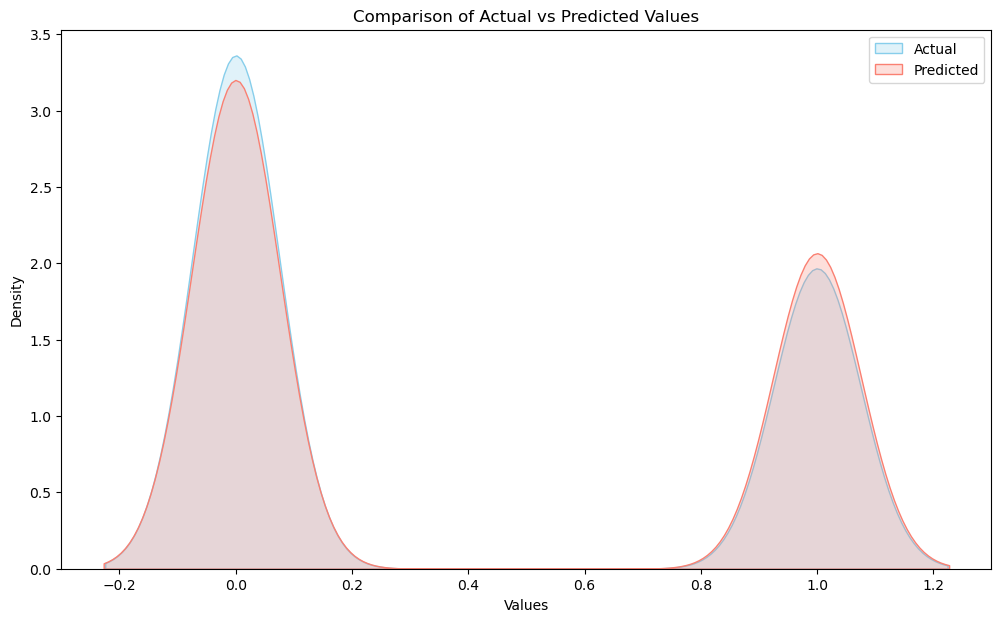

In [26]:
# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the kernel density estimate for actual and predicted values
sns.kdeplot(y_test, label='Actual', fill=True, color='skyblue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='salmon')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


Ensemble Learning with Extra Trees Classifier

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=1000,random_state=42)
et.fit(X_train,y_train)

y_pred = et.predict(X_test)

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      7027
           1       0.74      0.81      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139


Confusion Matrix:
[[5860 1167]
 [ 762 3350]]


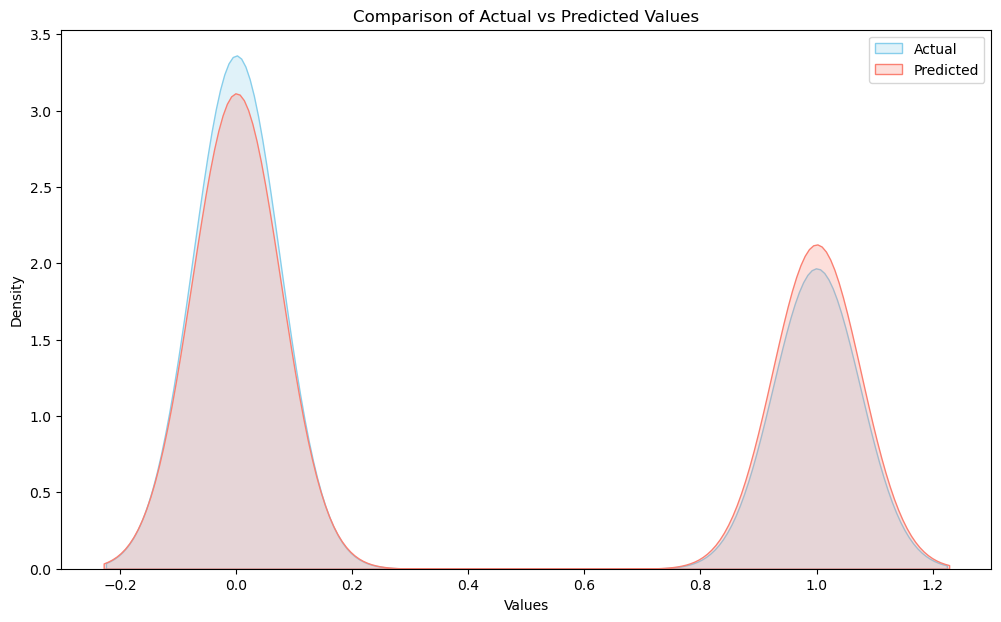

In [29]:
# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the kernel density estimate for actual and predicted values
sns.kdeplot(y_test, label='Actual', fill=True, color='skyblue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='salmon')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.75      0.80      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139


Confusion Matrix:
[[5940 1087]
 [ 837 3275]]


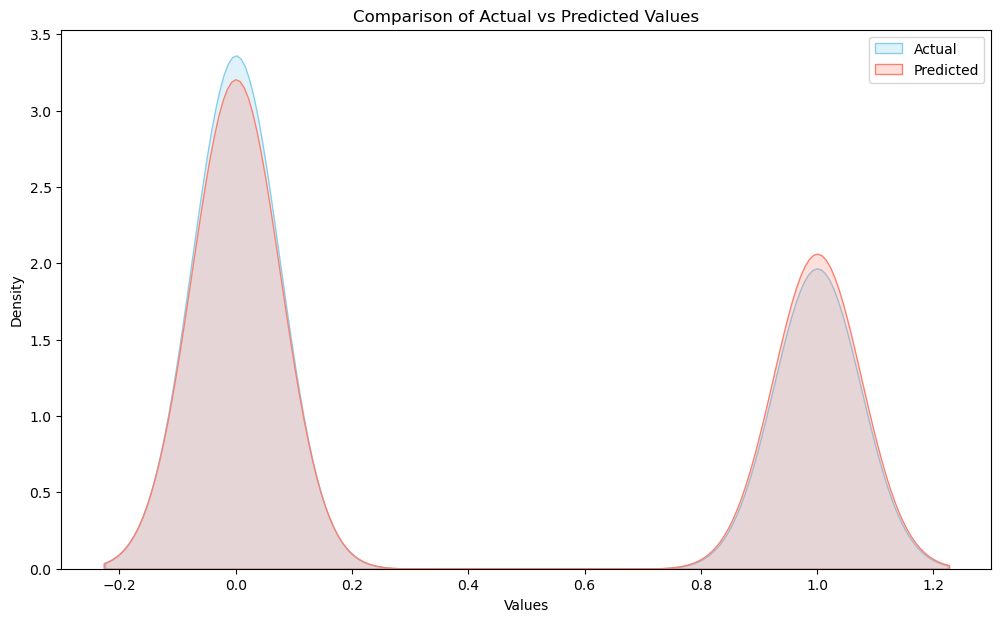

In [32]:
# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the kernel density estimate for actual and predicted values
sns.kdeplot(y_test, label='Actual', fill=True, color='skyblue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='salmon')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()


SELECTING THE BEST MODEL

In [35]:
from sklearn.metrics import recall_score, precision_score, f1_score

# List of classifiers
classifiers = [lr, dt, bagg, et, rfc]  # Assuming these are the names of your classifiers
classifier_names = ['Logistic Regression', 'Decision Tree', 'Bagging Classifier', 'Extra Trees Classifier', 'Random Forest']

# Initialize lists to store metrics
models = []
confusion_matrices = []
classification_reports = []
accuracies = []
recalls = []
precisions = []
f1_scores = []

# Loop through each classifier
for clf, clf_name in zip(classifiers, classifier_names):
    # Get predictions
    y_pred = clf.predict(X_test)

    # Store metrics in lists
    models.append(clf_name)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Create a DataFrame with metrics
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Recall': recalls,
    'Precision': precisions,
    'F1 Score': f1_scores
})

# Display the metrics table
print("Metrics for Each Model:")
print(metrics_df)

Metrics for Each Model:
                    Model  Accuracy    Recall  Precision  F1 Score
0     Logistic Regression  0.730586  0.730586   0.737281  0.732940
1           Decision Tree  0.789927  0.789927   0.789760  0.789842
2      Bagging Classifier  0.825658  0.825658   0.828607  0.826679
3  Extra Trees Classifier  0.826825  0.826825   0.832034  0.828319
4           Random Forest  0.827274  0.827274   0.830095  0.828257


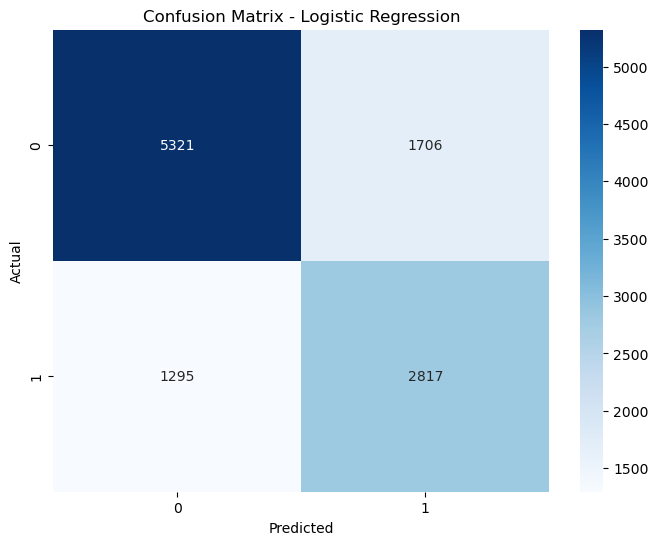

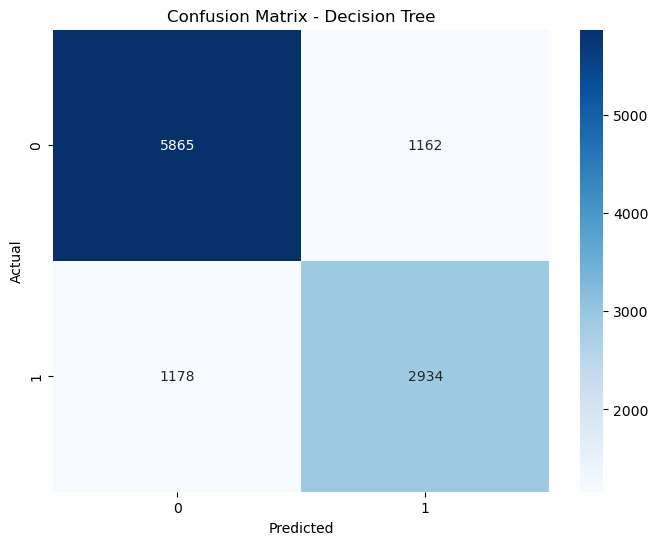

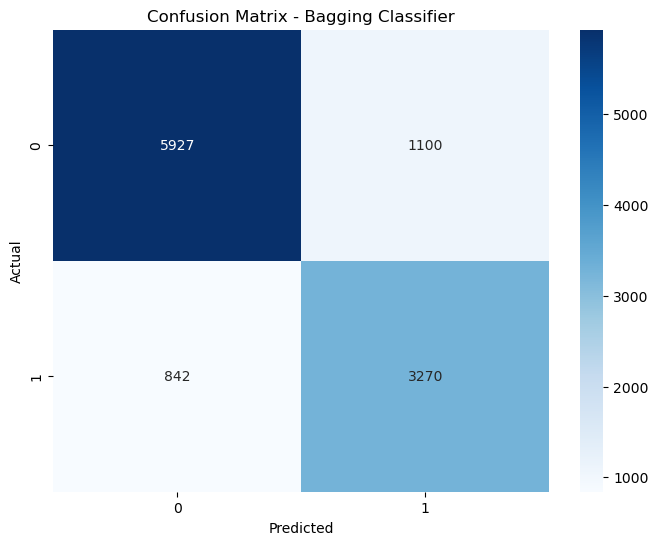

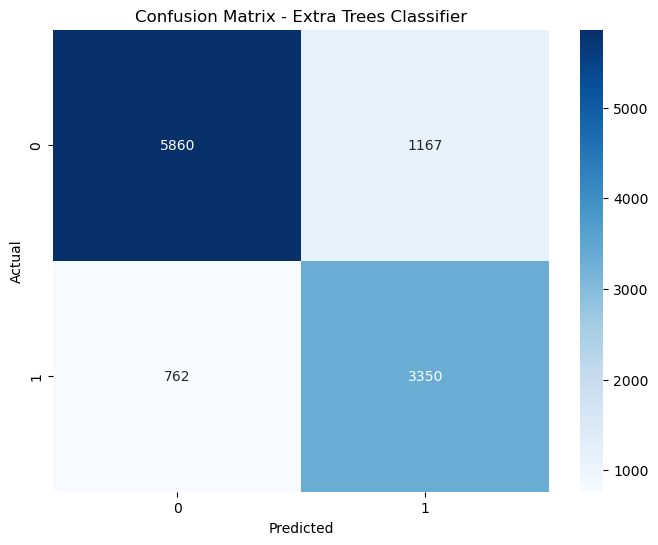

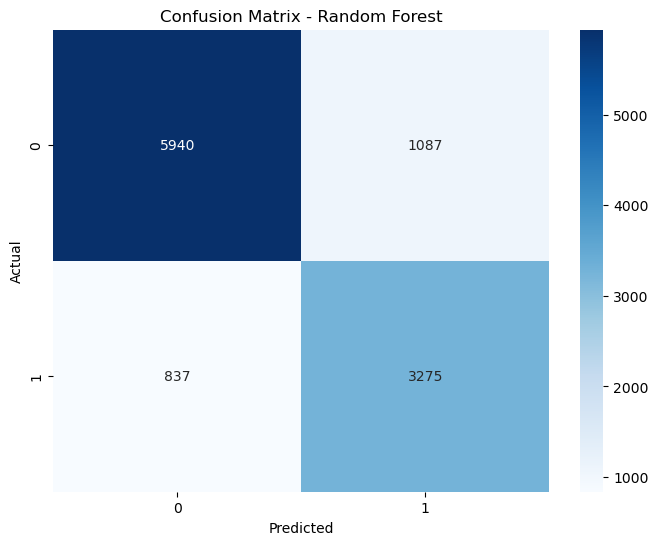

In [36]:
# Visualize confusion matrices using heatmaps
for clf, clf_name, confusion_matrix in zip(classifiers, classifier_names, confusion_matrices):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [37]:
# Select the best model based on highest accuracy
best_model_index = accuracies.index(max(accuracies))
best_model_name = models[best_model_index]
print(f"\nThe best model is {best_model_name} with an accuracy of {accuracies[best_model_index]:.2f}")


The best model is Random Forest with an accuracy of 0.83
